In [ ]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection, metrics

import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display

from grafica import *
from ClassPerceptron import Perceptron

#### Leemos los datos del archivo Sonar.csv

In [ ]:
datos = pd.read_csv(DATOS_DIR+"Sonar.csv")
nColum = list(datos.columns.values)
datos.head()

,Atrib_1,Atrib_2,Atrib_3,Atrib_4,Atrib_5,Atrib_6,Atrib_7,Atrib_8,Atrib_9,Atrib_10,...,Atrib_52,Atrib_53,Atrib_54,Atrib_55,Atrib_56,Atrib_57,Atrib_58,Atrib_59,Atrib_60,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


#### Conjuntos de datos para entrenamiento y testeo

In [ ]:
X = np.array(datos.iloc[:,:-1])

# asignamos el 1 a la clase 'Mine'
Y = np.array(datos.iloc[:,-1]=='Mine').astype(int)

X_train, X_test, T_train, T_test = model_selection.train_test_split( \
                                    X,Y, test_size=0.20)

#### Normalizamos los ejemplos de entrada

In [ ]:
normalizador = preprocessing.StandardScaler()
X_train = normalizador.fit_transform(X_train)
X_test = normalizador.transform(X_test)


#### Entrenamos el perceptrón

In [ ]:
ppn = Perceptron(alpha=0.05, n_iter=500, random_state=None)
ppn.fit(X_train, T_train)

#### Grafico de la cantidad de errores por iteración

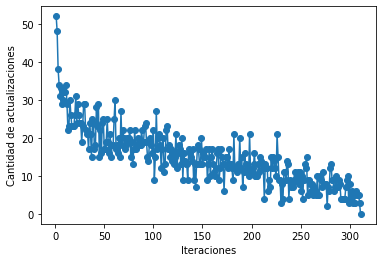

In [ ]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

#### Aciertos sobre los datos de entrenamiento

In [ ]:
Y_train = ppn.predict(X_train)
aciertos = sum(Y_train == T_train)
print("aciertos = ", aciertos)
nAciertos = sum(Y_train==T_train)
print("%% de aciertos = %.2f %%" % (100*nAciertos/len(Y_train)))


aciertos =  166
% de aciertos = 100.00 %


#### Evaluación del perceptrón sobre los datos de testeo

In [ ]:
Y_test = ppn.predict(X_test)
MM = metrics.confusion_matrix(T_test,Y_test)
print("Matriz de confusión:\n%s" % MM)

report = metrics.classification_report(T_test,Y_test)
print("\nResultado de la clasificación:\n%s" % report)

accuracy = metrics.accuracy_score(T_test,Y_test)
print("\nAccuracy: ", 100*accuracy, '%')


Matriz de confusión:
[[14  5]
 [ 4 19]]

Resultado de la clasificación:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        19
           1       0.79      0.83      0.81        23

    accuracy                           0.79        42
   macro avg       0.78      0.78      0.78        42
weighted avg       0.79      0.79      0.79        42


Accuracy:  78.57142857142857 %


#### AUC de la clase positiva (Clase 1)

AUC-ROC: 0.862700228832952


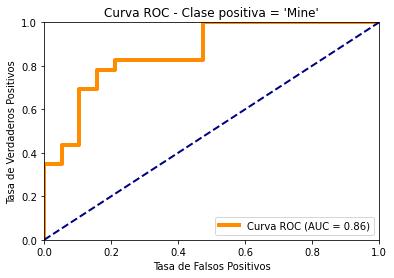

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

#-- si se quiere analizar la CLASE 1 --
Y_true = T_test   # Valores verdaderos de las clases siendo 1 la clase positiva
Y_prob = ppn.prob_positive_class(X_test) # Probabilidades de predicción para la clase 1

#-- si se quiere analizar la CLASE 0 --
#Y_true = (T_test+1) % 2   # Valores verdaderos de las clases siendo 1 la clase positiva
#Y_prob = 1-ppn.prob_positive_class(X_test) # Probabilidades de predicción para la clase 1

# Calcular AUC-ROC
auc = roc_auc_score(Y_true, Y_prob)
print(f"AUC-ROC: {auc}")

# Obtener los puntos para la curva ROC
fpr, tpr, thresholds = roc_curve(Y_true, Y_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=4, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title("Curva ROC - Clase positiva = 'Mine'")
plt.legend(loc="lower right")
plt.show()
